# Boer-Mulders Analysis

In [1]:
import sys
import os;os.chdir('../')
import itertools as it
import numpy as np
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
%matplotlib inline
from tools.tools import save,load,lprint,load_config
from tools.bar import BAR
from fitlab.resman import RESMAN
from fitlab.parman import PARMAN

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)

In [2]:
conf=load_config('inputs/boermulders_not_integrated.py')
conf['resman']=RESMAN(conf)
conf['resman'].get_residuals(conf['parman'].par);

loading sidis data sets 5007

## Data vs Theory

In [3]:
data=pd.concat([pd.DataFrame(conf['resman'].sidisres.tabs[idx]) for idx in conf['resman'].sidisres.tabs.keys()])

## Boer-Mulders

In [4]:
data.columns

Index([      u'Ebeam',           u'N',          u'Q2',       u'Shift',
                u'W2',       u'alpha',         u'col',          u'dy',
            u'hadron',           u'i',         u'obs',          u'pT',
            u'pT_bin', u'r-residuals',   u'residuals',       u'shift',
            u'stat_u',       u'sys_u',      u'target',         u'thy',
             u'value',           u'x',       u'x_bin',           u'y',
             u'y_bin',          u'yh',          u'yp',           u'z',
             u'z_bin'],
      dtype='object')

### Load
Load the data for different targets and hadrons into smaller DataFrames that are stored in a dictionary.  Then try to uncover the binning that was used in this dataset.

In [5]:
hadrons = np.unique(data.hadron)
targets = np.unique(data.target)

In [6]:
datasets = {}

for target in targets:
    datasets[target] = {}

    for hadron in hadrons:
        query_string = 'hadron == "%s" and target == "%s"' % (hadron, target)
        datasets[target][hadron] = data.query(query_string)

In [7]:
datasets['deuteron']['pi+'].head(4)

,Ebeam,N,Q2,Shift,W2,alpha,col,dy,hadron,i,...,thy,value,x,x_bin,y,y_bin,yh,yp,z,z_bin
0,27.6,1.0,1.094048,0.0,28.219119,0.101988,HERMES,3.678049,pi+,0,...,0.000225,0.00457,0.03848,1,0.54911,3,-0.311273,3.366776,0.25223,1
1,27.6,1.0,1.094646,0.0,28.234054,0.047600,HERMES,3.238218,pi+,1,...,0.000887,-0.03723,0.03848,1,0.54941,3,0.128830,3.367048,0.25798,1
2,27.6,1.0,1.095736,0.0,28.268691,0.039133,HERMES,2.915161,pi+,2,...,0.001946,0.05019,0.03847,1,0.55010,3,0.452643,3.367804,0.26710,1
3,27.6,1.0,1.097519,0.0,28.365285,0.072025,HERMES,2.662857,pi+,3,...,0.003160,0.03087,0.03840,1,0.55200,3,0.707576,3.370433,0.27873,1


In [8]:
axes               = ['x', 'z', 'pT', 'y']
bins               = {}

for target in targets:
    bins[target] = {}

    for hadron in hadrons:
        bins[target][hadron] = {}
        
        for axis in axes:
            axis_title = axis + '_bin'
            bins[target][hadron][axis] = np.unique(datasets[target][hadron][axis_title])


## Plotting Basics 
Now we are going to plot the $P_T$ results in different bins of x, z.

figure size (5, 6)


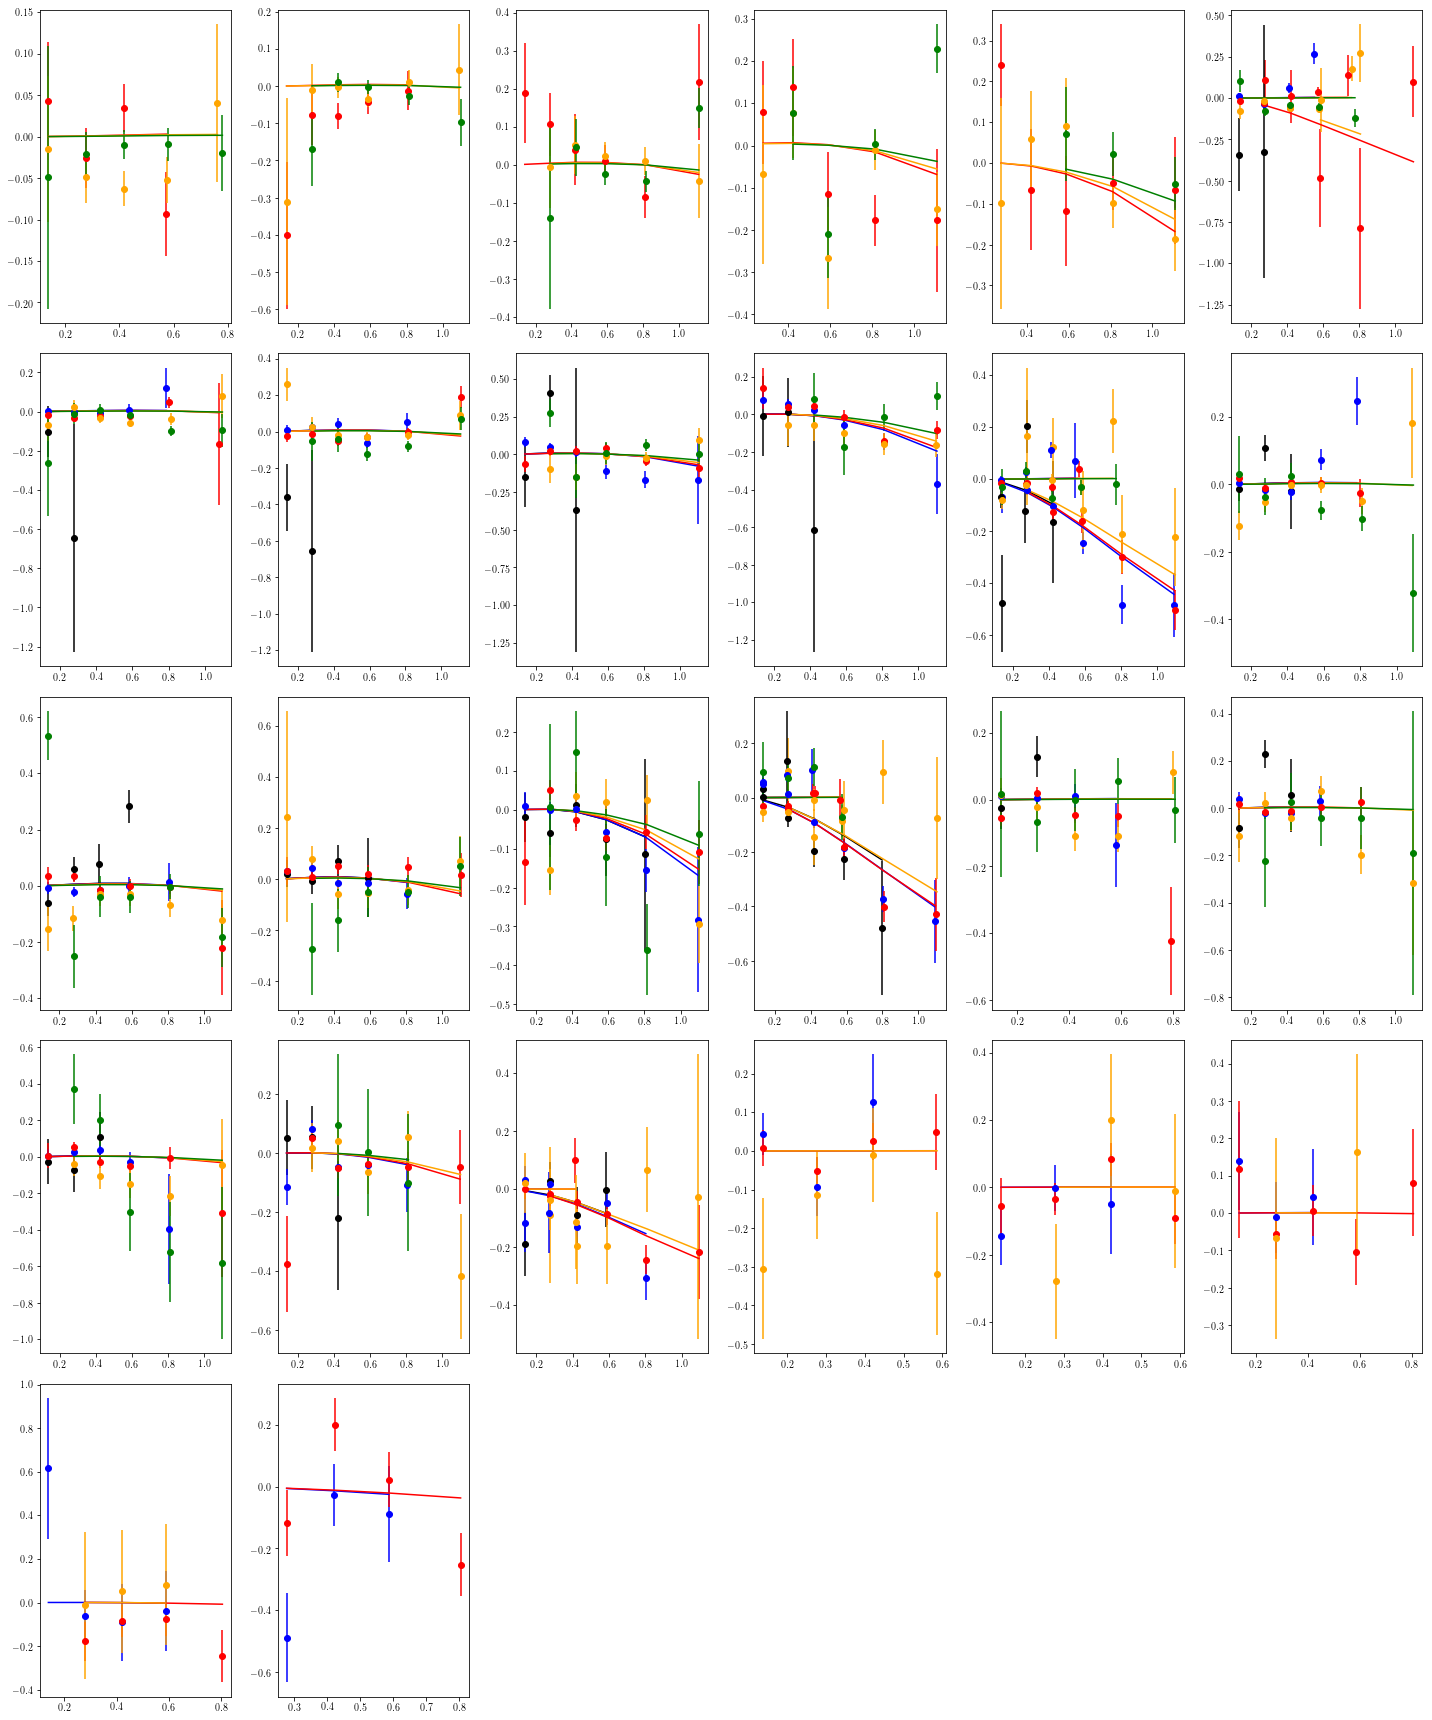

In [18]:
n_rows = len(bins['proton']['pi+']['x'])
n_cols = len(bins['proton']['pi+']['z'])
colors = ['black', 'blue', 'red', 'orange', 'green', 'pink']

print('figure size (%d, %d)' % (n_rows, n_cols))

plt.figure(figsize=(4*n_rows, 4*n_cols))

for ix in range(n_rows):
    for iz in range(n_cols):
        index = ix*n_rows + iz + 1
        plt.subplot(n_rows, n_cols, index)
        
        query_string = 'x_bin == %d and z_bin == %d' % (ix+1, iz+1)
        data_subset = datasets['proton']['pi+'].query(query_string)
        
        for y_index, y_value in enumerate(bins['proton']['pi+']['y']):
            d = data_subset.query('y_bin == %f' % y_value)
            
#            scale = 1000*y_index+1
            scale = 1
            plt.errorbar(d['pT'], 
                     scale*d['value'], 
                     scale*d['alpha'],
                    marker='o', linestyle='', color=colors[y_index])
            
            plt.plot(d['pT'],
                    scale*d['thy'],
                    marker='', color=colors[y_index])
plt.tight_layout()